In [1]:
import sys
sys.path.append('../../Share')
import config
import baseline
import Target

import numpy as np
import pandas as pd

In [2]:
baseline_K_val = [1, 4, 7, 11, 14]

if __name__ == "__main__":
    for K in baseline_K_val:
        trainer = baseline.ModelTrainer(config, subject="Carlson")
        trainer.run_all_sessions_training_K_data(K)
        df = trainer.save_results(f'../../Results/Results_Carlson/Baseline_results_train_with_{K}data_C.csv')

# 저장해놨어서 데이터 업데이트 전에 한번 돌리면 굳이 안돌려도 됨'''

Dataset 1/14 - Session Exp_2025-06-30-v1/E9AD0E7DCC2B/
(8493, 4, 14, 1) (8493,) (86, 4, 14, 1) (86,)
Dataset 2/14 - Session Exp_2025-06-30-v2/E9AD0E7DCC2B/
second (8493, 4, 14, 1) (8493,) (86, 4, 14, 1) (86,)
Start Training (total epochs: 50)...
Finish Training! (Model is saved)
Maximum training accuracy : 82.0%
Maximum validation accuracy : 87.21%
Accuracy of test dataset using model V0: 87.2093%
Dataset 3/14 - Session Exp_2025-07-09-v1/E9AD0E7DCC2B/
Accuracy on unseen dataset: 83.0530%
Dataset 4/14 - Session Exp_2025-07-09-v2/E9AD0E7DCC2B/
Accuracy on unseen dataset: 83.1440%
Dataset 5/14 - Session Exp_2025-07-10-v1/E9AD0E7DCC2B/
Accuracy on unseen dataset: 80.5562%
Dataset 6/14 - Session Exp_2025-07-10-v2/E9AD0E7DCC2B/
Accuracy on unseen dataset: 82.6636%
Dataset 7/14 - Session Exp_2025-07-11-v1/E9AD0E7DCC2B/
Accuracy on unseen dataset: 82.4899%
Dataset 8/14 - Session Exp_2025-07-11-v2/E9AD0E7DCC2B/
Accuracy on unseen dataset: 83.0154%
Dataset 9/14 - Session Exp_2025-07-16-v1/E9AD0E

In [3]:
b_path = 'C:/Users/hml76/PycharmProjects/MindForce/'
baseline_K = ['1', '4', '7', '11', '14']
baselines = []

for idx, K in enumerate(baseline_K):
    baselines.append(b_path + f'/github/Results/Results_Carlson/Baseline_results_train_with_{K}data_C.csv')

SUBJECT = "Carlson"

In [4]:
prog_trainer = Target.ProgressiveTrainer(config, subject=SUBJECT)
Init_acc_all, Prev_acc_all, Trained_acc_all = prog_trainer.run(plot_learning_curve=False)


Dataset 1/14 - Session Exp_2025-06-30-v1/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 80.63%
Maximum validation accuracy : 80.44%

Dataset 2/14 - Session Exp_2025-06-30-v2/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 83.45%
Maximum validation accuracy : 83.88%

Dataset 3/14 - Session Exp_2025-07-09-v1/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 86.5%
Maximum validation accuracy : 86.82%

Dataset 4/14 - Session Exp_2025-07-09-v2/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 87.25%
Maximum validation accuracy : 87.02%

Dataset 5/14 - Session Exp_2025-07-10-v1/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 83.29%
Maximum validation

In [5]:
pd.DataFrame(Trained_acc_all).to_csv(f'../../Results/Results_Carlson/Train_Test_per_sessions.csv', index=False)

In [6]:
for idx, x in enumerate([Init_acc_all, Prev_acc_all, Trained_acc_all]):
    if idx==0:
        print(f"Average of acc without training anything (should be random): {np.mean(x)*100:.2f}%")
    elif idx==1:
        print(f"Average of acc using previous test data after training: {np.mean(x)*100:.2f}%")
    elif idx==2:
        print(f"Average of acc using current test data after training: {np.mean(x)*100:.2f}%")
for idx, b in enumerate(baselines):
    val = float(np.mean(pd.read_csv(baselines[idx])['Accuracy'][int(baseline_K[idx]):]))
    print(f"K-{baseline_K[idx]}: {val:.2f}% | Target: {np.mean(Trained_acc_all[int(baseline_K[idx]):])*100:.2f}")

Average of acc without training anything (should be random): 14.31%
Average of acc using previous test data after training: 82.14%
Average of acc using current test data after training: 85.46%
K-1: 82.82% | Target: 85.85
K-4: 84.41% | Target: 85.83
K-7: 86.92% | Target: 86.14
K-11: 86.75% | Target: 85.57
K-14: nan% | Target: nan


In [11]:
np.array(baseline_result['Info'])

array(['Stand (6/30)', 'Sit_chair (6/30)', 'Stand (7/9)',
       'Sit_chair (7/9)', 'Stand (7/10)', 'Sit_chair (7/10)',
       'Stand (7/11)', 'Sit_chair (7/11)', 'Stand (7/16)',
       'Sit_chair (7/16)', 'Stand (7/17)', 'Sit_chair (7/17)',
       'Stand (7/23)', 'Sit_chair (7/23)'], dtype=object)

In [9]:
Trained_acc_all

[0.8043832778930664,
 0.8388010263442993,
 0.8682440519332886,
 0.8701599836349487,
 0.8308227062225342,
 0.8485059142112732,
 0.874218225479126,
 0.8783155083656311,
 0.8267698287963867,
 0.8579825758934021,
 0.8994219899177551,
 0.8892749547958374,
 0.8252606987953186,
 0.8525462746620178]

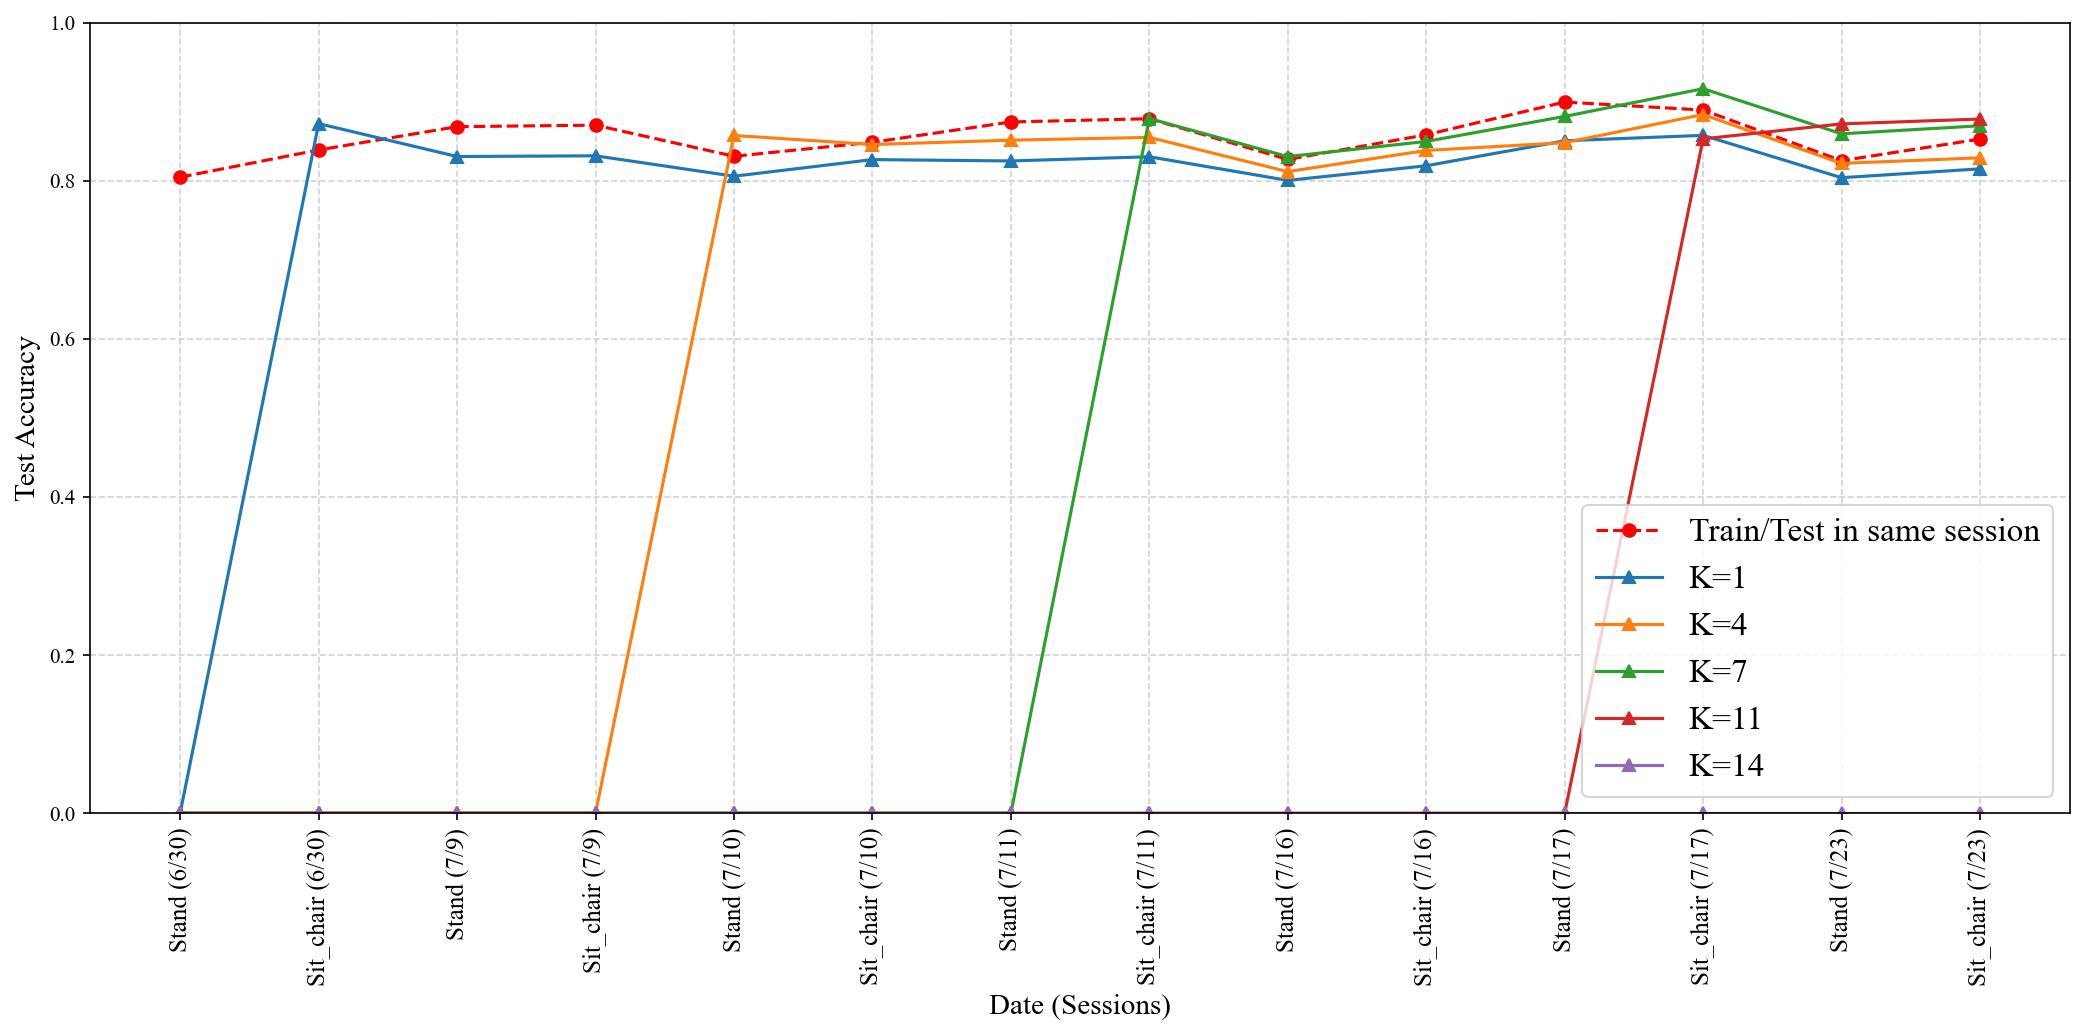

In [12]:
import matplotlib.pyplot as plt

Trained_acc_all_stored = [0.8043832778930664, 0.8388010263442993, 0.8682440519332886, 0.8701599836349487, 0.8308227062225342, 0.8485059142112732, 0.874218225479126, 0.8783155083656311, 0.8267698287963867, 0.8579825758934021, 0.8994219899177551, 0.8892749547958374, 0.8252606987953186, 0.8525462746620178]

X_labels = ['Stand (6/30)', 'Sit_chair (6/30)', 'Stand (7/9)', 'Sit_chair (7/9)', 'Stand (7/10)', 'Sit_chair (7/10)',
       'Stand (7/11)', 'Sit_chair (7/11)', 'Stand (7/16)', 'Sit_chair (7/16)', 'Stand (7/17)', 'Sit_chair (7/17)', 'Stand (7/23)', 'Sit_chair (7/23)']

plt.rcParams['font.family'] = 'Times New Roman'

plt.figure(figsize=(14, 7), dpi=150)
#plt.title('Training from scratch every time', fontsize=15)
plt.plot(Trained_acc_all_stored, c='red', label='Train/Test in same session', marker='o', linestyle='--')
for idx, base in enumerate(baselines):
    baseline_result = pd.read_csv(base)
    plt.plot(X_labels, baseline_result['Accuracy'] / 100, marker='^', label=f'K={baseline_K[idx]}', linestyle='-')

plt.ylim([0, 1])
plt.xlabel('Date (Sessions)', fontsize=14)
plt.ylabel('Test Accuracy', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.legend(fontsize=16, ncol=1, loc='lower right')
plt.grid(True, linestyle='--', color='lightgrey')
plt.tight_layout()
plt.show()